## Valeria Pérez Cong
## 145009
## Noviembre 2, 2017

Brief description: Design an experiment to visualize the learning slowdown problem in deep networks. Experiment with different transfer functions


# El problema del círculo

In [1]:
import tensorflow as tf

import os
import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.stats import norm
from sklearn import preprocessing
from random import random
import math
from sklearn import datasets, linear_model

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


In [2]:
##Para generar los datos se utilizó R Studio
#x<-runif(1500, -2, 2)
#y <- runif(1500, -2, 2)
#r <- 1
#target <- ifelse(sqrt(x^2+y^2) <= r^2, 1,0)
#data_set <- data.frame(x=x, y=y,target=target)

circle=pd.read_csv("/Users/valeriaperezcong/Desktop/ITAM/9/aprendizaje/udemy/DataScience-Python3/DeepLearning/circle_data.csv")

In [3]:
circle.describe()

,x,y,target
count,1500.000000,1500.000000,1500.000000
mean,0.025768,-0.010534,0.180667
std,1.180886,1.154959,0.384870
min,-1.999495,-1.997327,0.000000
25%,-1.018630,-1.011903,0.000000
50%,0.010652,-0.041783,0.000000
75%,1.090813,1.020028,0.000000
max,1.999295,1.999903,1.000000


Para poder entrenar la red neuronal, generamos 1500 numeros aleatorios para x y y. Si x^2 + y^2<=1^2 la variable target es 1 (es decir, el punto x y sí está dentro del círculo) y 0 en otro caso. 

In [4]:
col_x= circle.ix[:,0]
col_y=circle.ix[:,1]
target=circle.ix[:,2]

In [5]:
X=[]
Y=[]

for i in range (0,1500):
    X.append([col_x[i],col_y[i]])

for j in range (0,1500):
    Y.append([target[j]])
    


In [6]:
X=np.asarray(X)
Y=np.asarray(Y)


In [36]:
input_size = 2
output_layer_size = 1

input_data= tf.placeholder(tf.float32,[None, input_size])

target = tf.placeholder(tf.float32,[None, output_layer_size])

In [37]:
hidden_nodes=4
#hold weights and biases between each training run 
#2,2


input_weights=tf.Variable(tf.random_uniform([input_size,hidden_nodes],-1,1),name="input_weights")

input_biases= tf.Variable(tf.random_uniform([hidden_nodes]),name="input_biases")



hidden_weights= tf.Variable(tf.random_uniform([hidden_nodes,output_layer_size],-1,1),name="hidden_weights")

hidden_biases=tf.Variable(tf.random_uniform([output_layer_size]),name="hidden_biases")

In [38]:
#nuestra capa de input es una multiplicacion matricial entre 
#los datos de entrada y sus respectivos pesos
#aquí estamos poniendo las conexiones entre las capas
input_layer=tf.matmul(input_data,input_weights)
hidden_layer=tf.nn.sigmoid(input_layer+input_biases)



output_layer=tf.nn.sigmoid(tf.matmul(hidden_layer,hidden_weights)+hidden_biases)

In [39]:
#para medir qué tan correctos fueron nuestros resultados 
# usamos softmax_cross_entropy para penalizar más rápido los errores

loss_function=tf.reduce_mean(tf.reduce_sum((target-output_layer)**2))

In [40]:
optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss_function)

In [41]:
#Evaluamos 
correct_prediction = tf.equal(tf.argmax(output_layer,1), tf.argmax(target,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## Corremos la red

In [42]:
init=tf.global_variables_initializer()
sess=tf.Session()

train_steps=[]
errores=[]
input_biases_array=[] 
hidden_biases_array=[] 

input_weights_array=[] 
hidden_weights_array=[]

#corremos 5000 training steps
sess.run(init)
for i in range(5000):
    train, error, input_w, hidden_w, input_b,hidden_b = sess.run([optimizer, loss_function, input_weights, hidden_weights, input_biases, hidden_biases], feed_dict={input_data: X, target: Y})
    errores.append(error)
    train_steps.append(train)
    hidden_biases_array.append(hidden_b)

In [43]:
correct_prediction = tf.equal(tf.round(output_layer),target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={input_data: X, target: Y})) 

0.996667


Podemos ver que el modelo tiene una accuracy del 99.66% 

In [46]:
len(hidden_biases_array)

5000

In [47]:
len(train_steps)

5000

In [48]:
range(0,1500)

range(0, 1500)

In [49]:
steps = [i for i in range(5000)]

In [50]:
len(steps)

5000

## Learning Slowdown

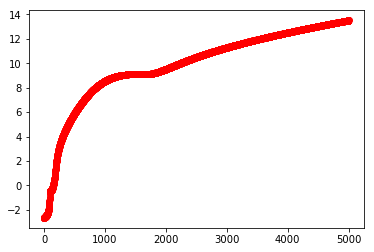

In [51]:
plt.scatter(steps, hidden_biases_array, color='red')
plt.show()
